# **Challenge Alura Store Latam**

## **Challenge de la Formación:** Practicando Python para Data Science G8-ONE

## **Daniel Ortiz Aristizábal**

#Importación de datos



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



### Ingresos totales en cada tienda

In [2]:
tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

In [3]:
def calcular_ingresos_por_tienda(tiendas):
    ingresos_por_tienda = []
    for tienda in tiendas:
        ingresos = tienda['Precio'].sum()
        ingresos_por_tienda.append(ingresos)
    return ingresos_por_tienda

ingresos_por_tienda = calcular_ingresos_por_tienda(tiendas)

for nombre, ingresos in zip(nombres, ingresos_por_tienda):
    print(f"{nombre}: ${ingresos:,.0f} COP")

Tienda 1: $1,150,880,400 COP
Tienda 2: $1,116,343,500 COP
Tienda 3: $1,098,019,600 COP
Tienda 4: $1,038,375,700 COP


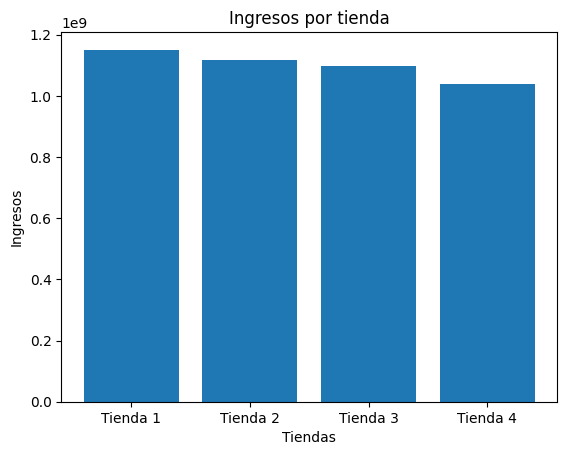

In [4]:
def graficar_ingresos_por_tienda(nombres, ingresos_por_tienda):
    plt.bar(nombres, ingresos_por_tienda)
    plt.xlabel('Tiendas')
    plt.ylabel('Ingresos')
    plt.title('Ingresos por tienda')

graficar_ingresos_por_tienda(nombres, ingresos_por_tienda)

# 2. Ventas por categoría

### Cantidad de productos vendidos por categoría en cada tienda

In [5]:
def calcular_productos_por_categoria(tiendas):
    productos_por_categoria = []
    for tienda in tiendas:
        productos = tienda.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
        productos_por_categoria.append(productos)
    return productos_por_categoria

productos_por_categoria = calcular_productos_por_categoria(tiendas)

for nombre, productos in zip(nombres, productos_por_categoria):
    print(f"-----------{nombre}-----------")
    print(productos)
    print()

-----------Tienda 1-----------
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: Producto, dtype: int64

-----------Tienda 2-----------
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: Producto, dtype: int64

-----------Tienda 3-----------
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
Name: Producto, dtype: int64

----

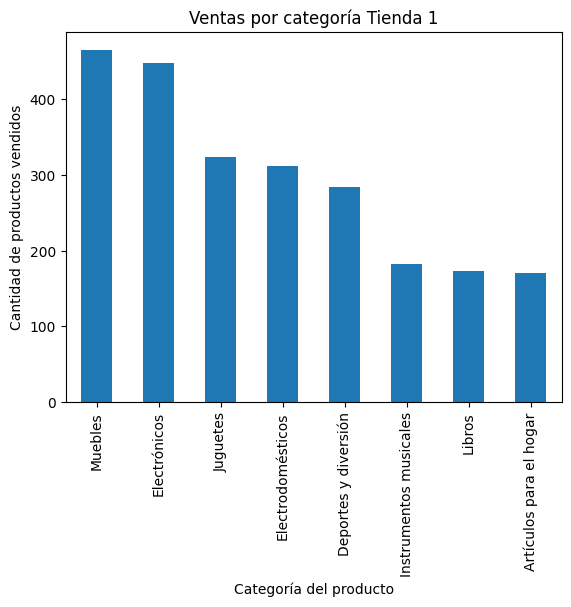

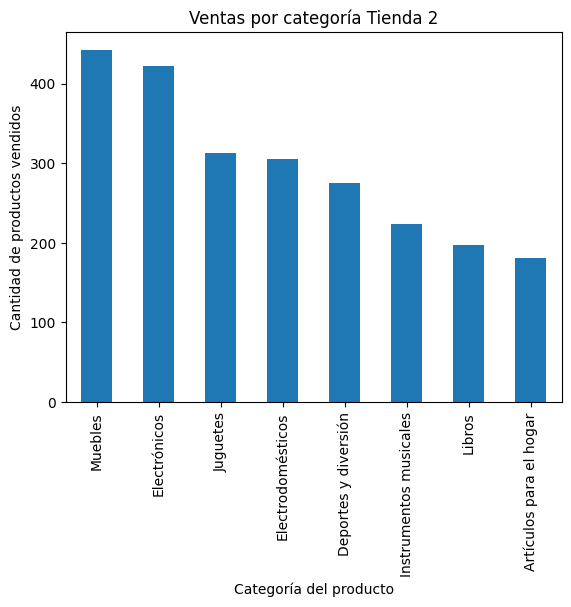

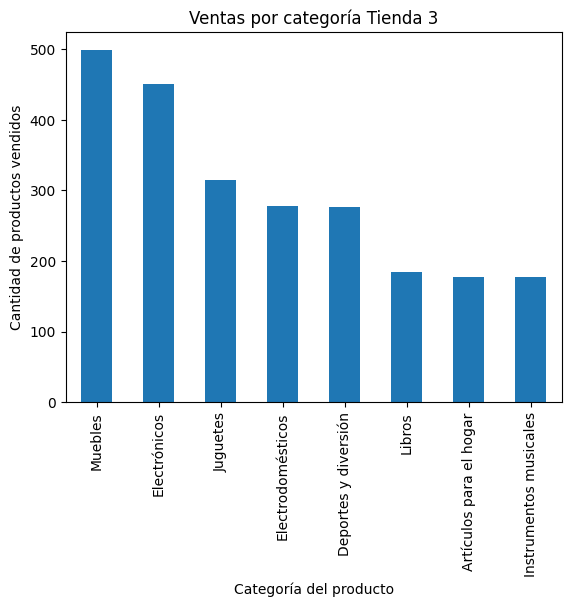

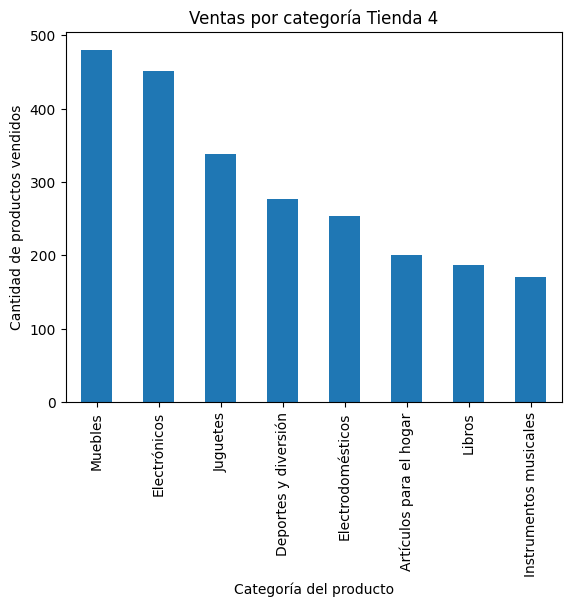

In [6]:
def graficar_productos_por_categoria(nombres, productos_por_categoria):
    for nombre, productos in zip(nombres, productos_por_categoria):
        plt.figure
        productos.plot(kind='bar')
        plt.xlabel('Categoría del producto')
        plt.ylabel('Cantidad de productos vendidos')
        plt.title(f'Ventas por categoría {nombre}')
        plt.show()
        print()

graficar_productos_por_categoria(nombres, productos_por_categoria)

# 3. Calificación promedio de la tienda


### Calificaciones promedio de los clientes para cada tienda

In [7]:
def calcular_calificacion_promedio(tiendas):
    calificacion_promedio = []
    for tienda in tiendas:
        promedio = tienda['Calificación'].mean()
        calificacion_promedio.append(promedio)
    return calificacion_promedio

calificacion_promedio = calcular_calificacion_promedio(tiendas)

for nombre, calificacion in zip(nombres, calificacion_promedio):
    print(f"{nombre}: {calificacion:.2f}")

Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


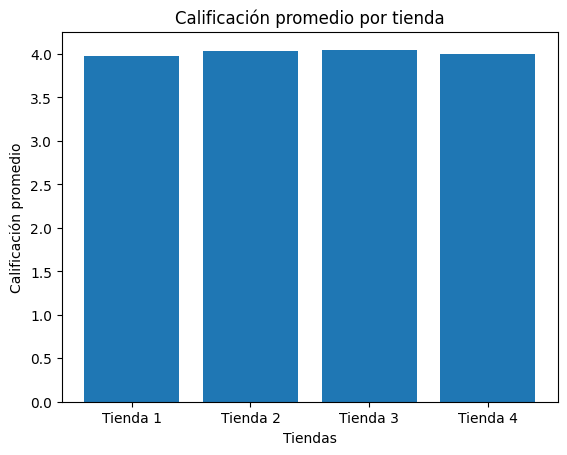

In [8]:
def graficar_calificacion_promedio(nombres, calificacion_promedio):
    plt.bar(nombres, calificacion_promedio)
    plt.xlabel('Tiendas')
    plt.ylabel('Calificación promedio')
    plt.title('Calificación promedio por tienda')
    plt.show()

graficar_calificacion_promedio(nombres, calificacion_promedio)

# 4. Productos más y menos vendidos

In [9]:
def calcular_productos_mas_vendidos(tiendas):
    productos_mas_vendidos = []
    for tienda in tiendas:
        mas_vendidos = tienda['Producto'].value_counts().sort_values(ascending=False).head(5)
        productos_mas_vendidos.append(mas_vendidos)
    return productos_mas_vendidos

def calcular_productos_menos_vendidos(tiendas):
    productos_menos_vendidos = []
    for tienda in tiendas:
        menos_vendidos = tienda['Producto'].value_counts().sort_values(ascending=False).tail(5)
        productos_menos_vendidos.append(menos_vendidos)
    return productos_menos_vendidos

productos_mas_vendidos = calcular_productos_mas_vendidos(tiendas)
productos_menos_vendidos = calcular_productos_menos_vendidos(tiendas)

In [10]:
for nombre, mas_vendidos, menos_vendidos in zip(nombres, productos_mas_vendidos, productos_menos_vendidos):
    print(f"-------------{nombre}-------------")
    print("Productos más vendidos:")
    print(mas_vendidos)
    print()
    print("Productos menos vendidos:")
    print(menos_vendidos)
    print()

-------------Tienda 1-------------
Productos más vendidos:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Productos menos vendidos:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

-------------Tienda 2-------------
Productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Productos menos vendidos:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

-------------Tienda 3-------------
Productos más vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          

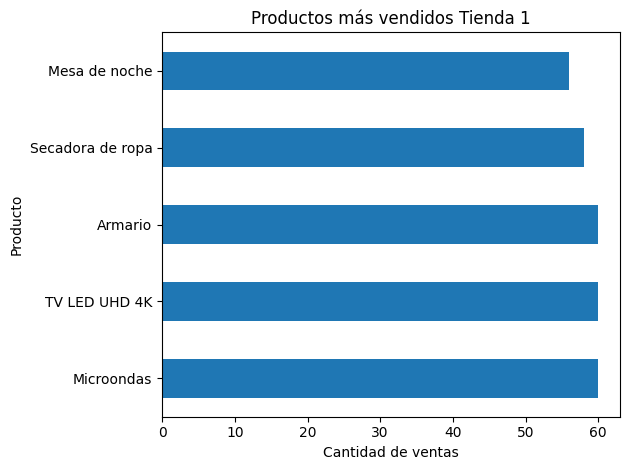

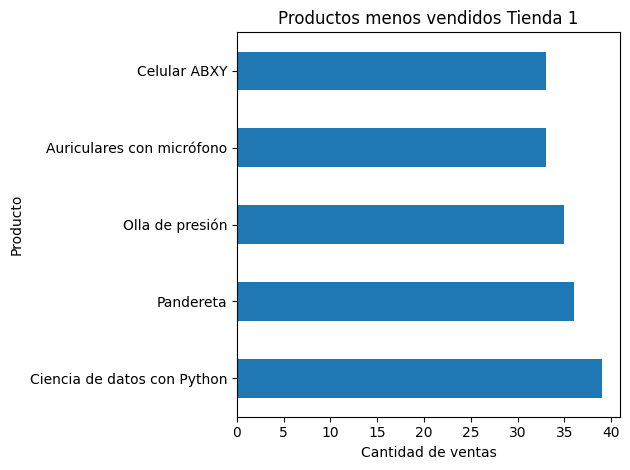

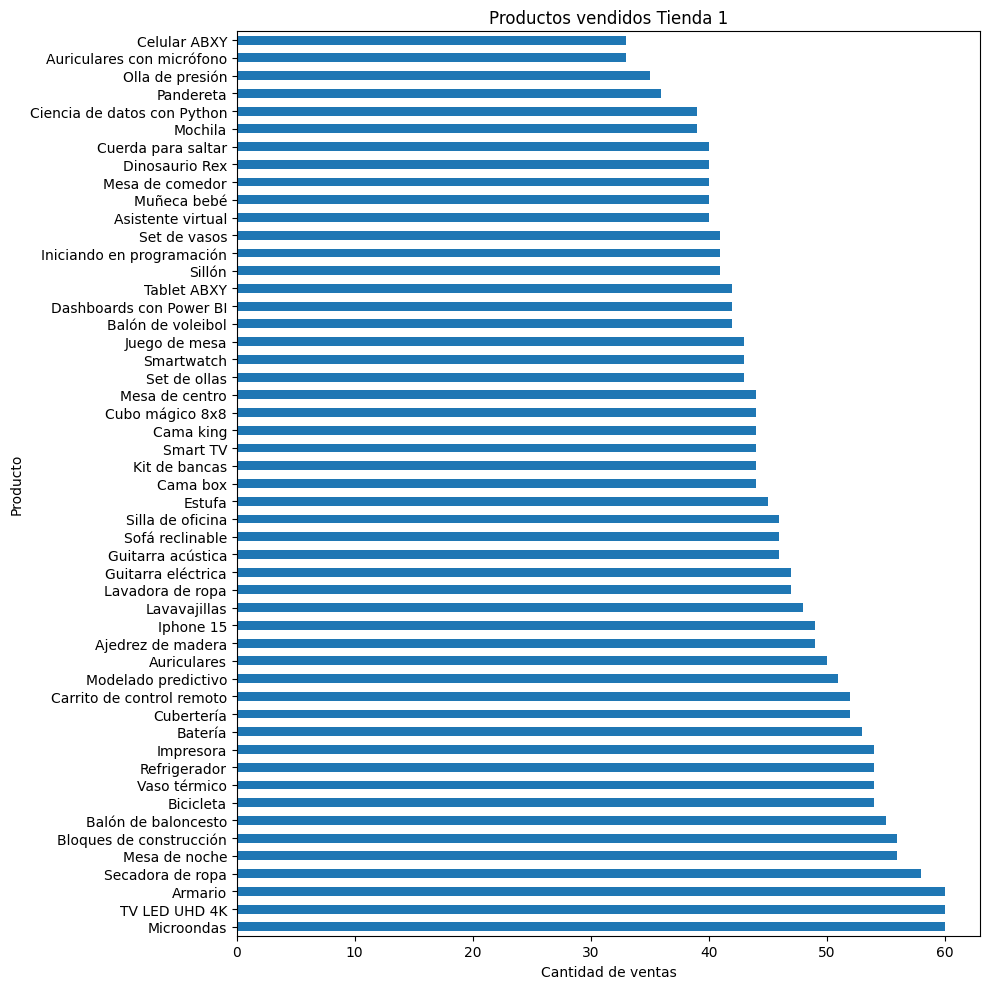

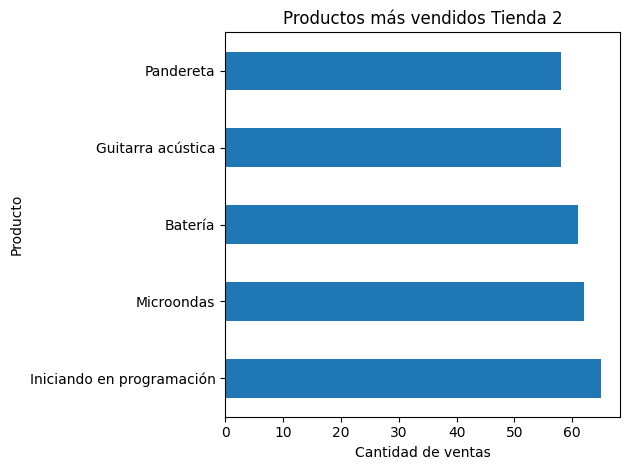

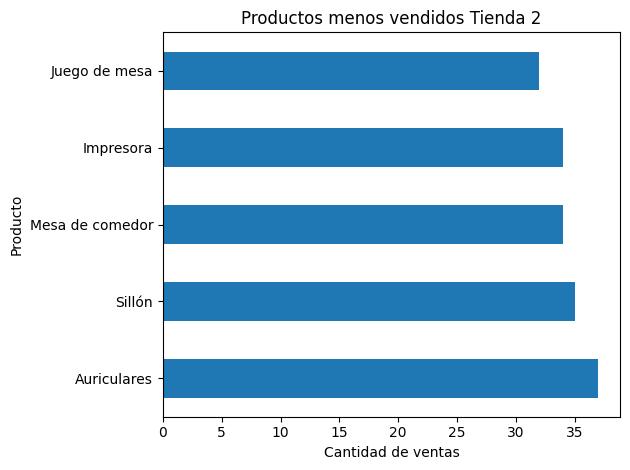

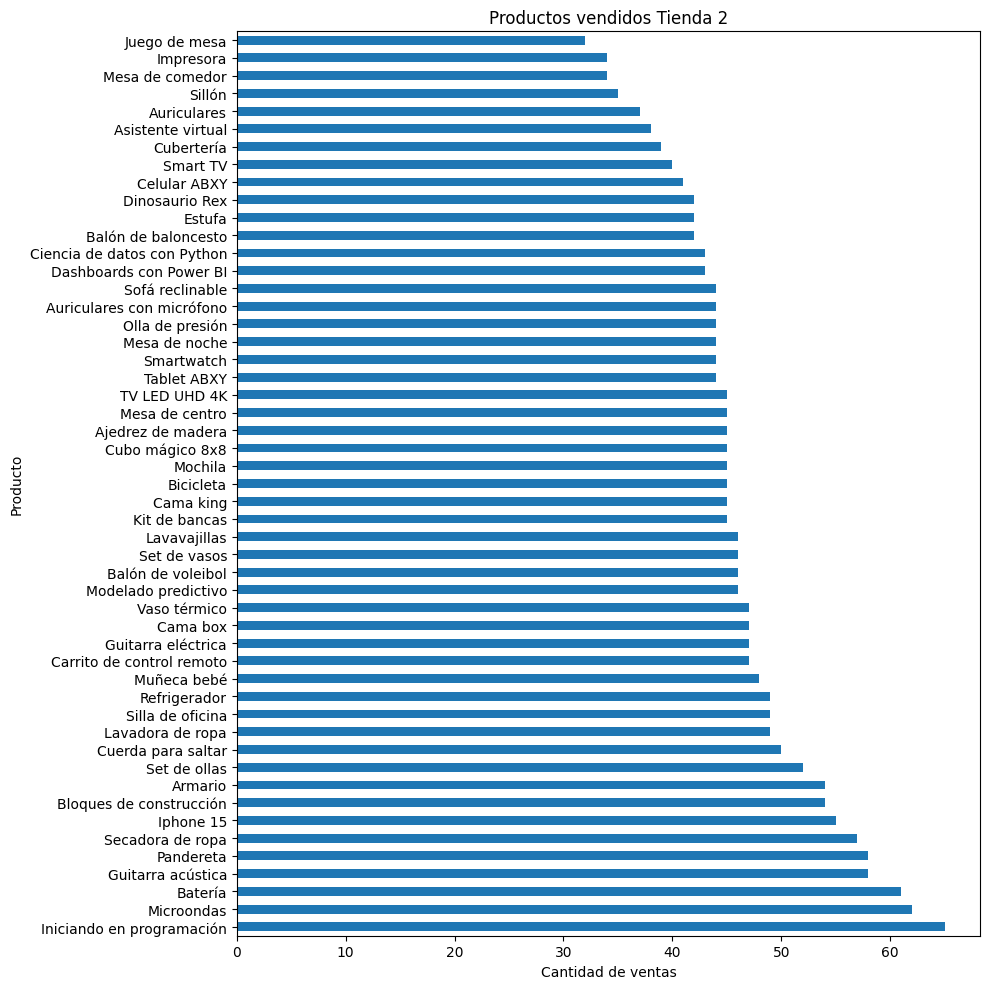

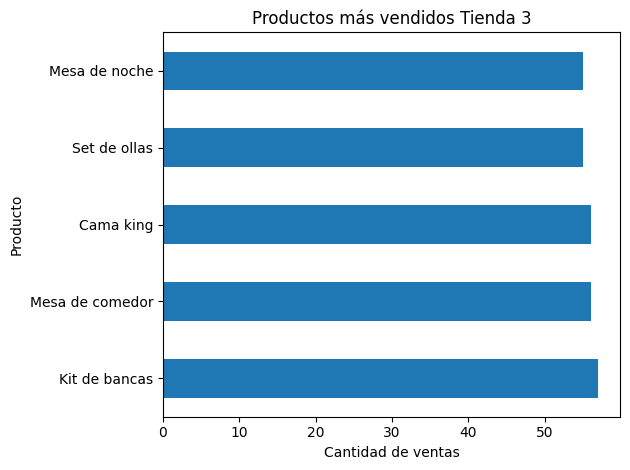

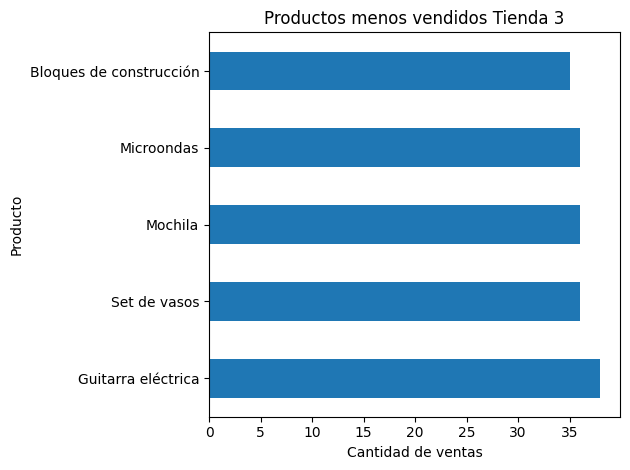

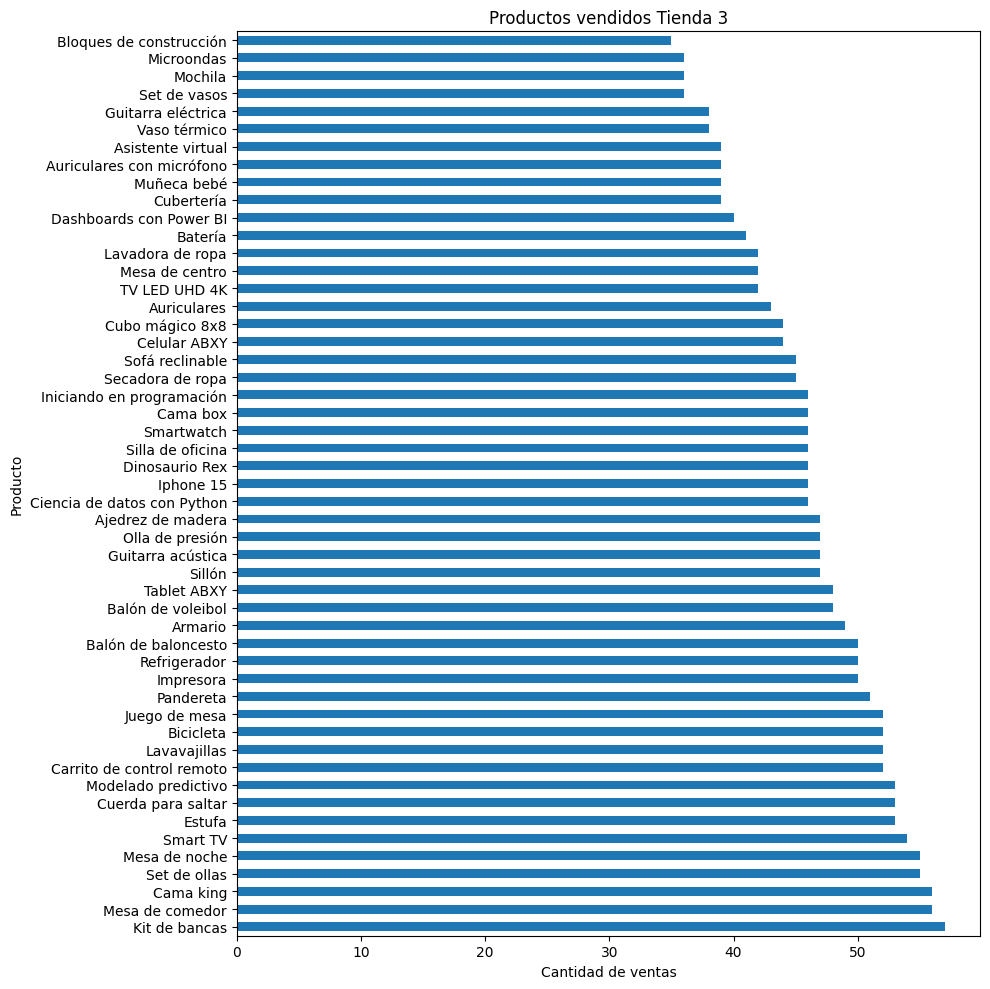

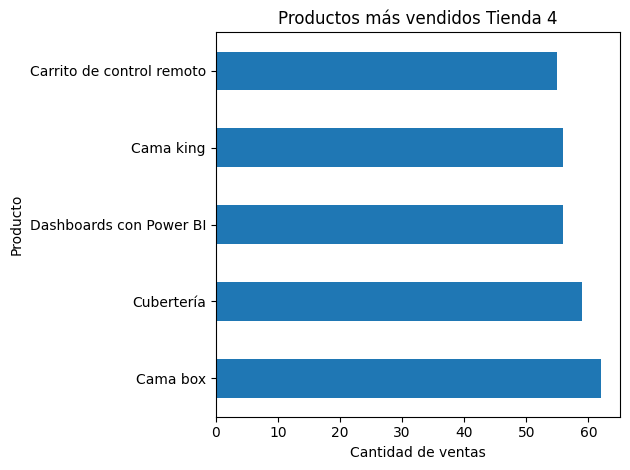

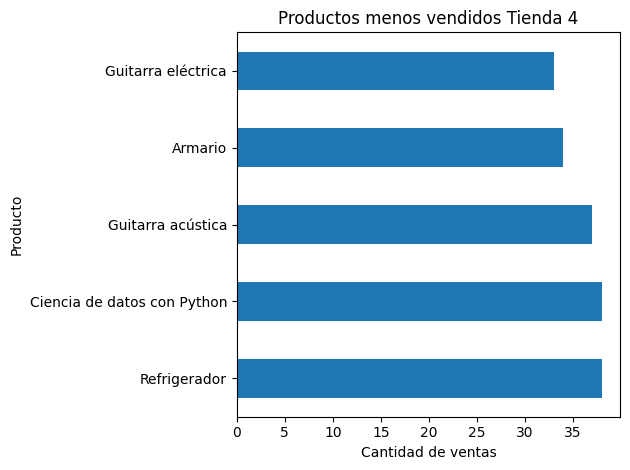

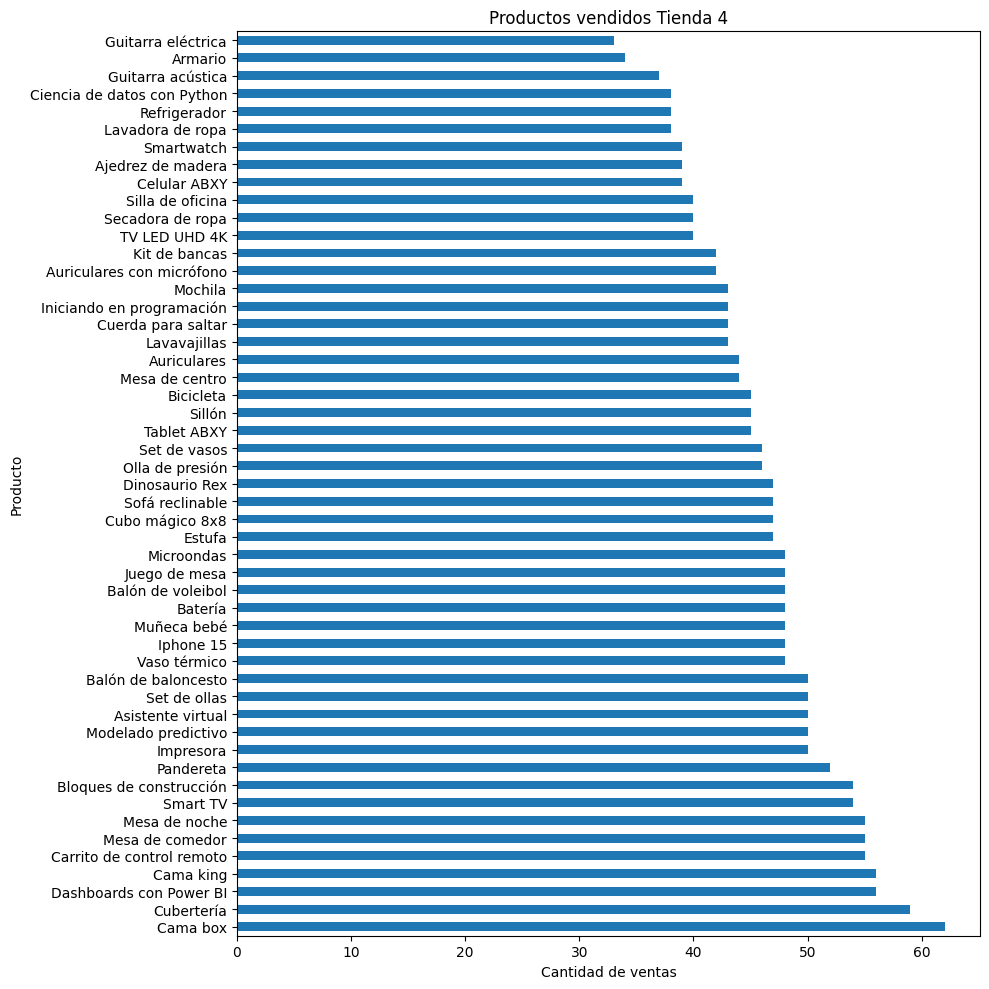

In [11]:
def graficar_ventas(nombres, tiendas, productos_mas_vendidos, productos_menos_vendidos):
    for nombre, tienda, mas_vendidos, menos_vendidos in zip(nombres, tiendas, productos_mas_vendidos, productos_menos_vendidos):
        # Graficar los productos más vendidos
        mas_vendidos.plot(kind='barh')
        plt.xlabel('Cantidad de ventas')
        plt.ylabel('Producto')
        plt.title(f'Productos más vendidos {nombre}')
        plt.tight_layout()
        plt.show()
        print()

        # Graficar los productos menos vendidos
        menos_vendidos.plot(kind='barh')
        plt.xlabel('Cantidad de ventas')
        plt.ylabel('Producto')
        plt.title(f'Productos menos vendidos {nombre}')
        plt.tight_layout()
        plt.show()
        print()

        # Graficar los productos vendidos totales
        plt.figure(figsize=(10, 10))
        tienda['Producto'].value_counts().plot(kind='barh')
        plt.xlabel('Cantidad de ventas')
        plt.ylabel('Producto')
        plt.title(f'Productos vendidos {nombre}')
        plt.tight_layout()
        plt.show()
        print()

graficar_ventas(nombres, tiendas, productos_mas_vendidos, productos_menos_vendidos)

# 5. Envío promedio por tienda

### Valor del envío promedio por tienda

In [12]:
valor_envio_promedio = [tienda["Costo de envío"].mean() for tienda in tiendas]

for nombre, valor_envio in zip(nombres, valor_envio_promedio):
    print(f"{nombre}: ${valor_envio:,.0f} COP")

Tienda 1: $26,019 COP
Tienda 2: $25,216 COP
Tienda 3: $24,806 COP
Tienda 4: $23,459 COP


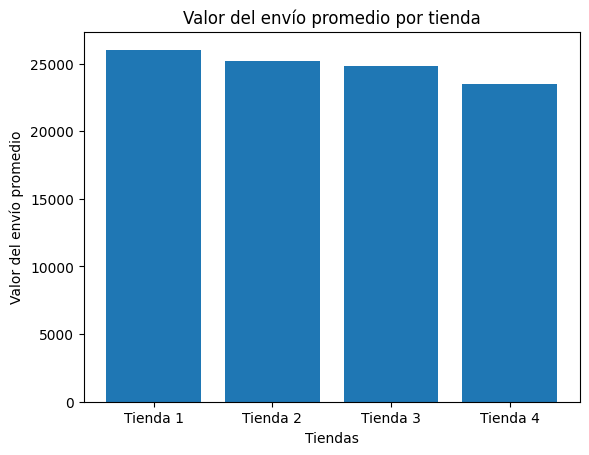

In [13]:
plt.bar(nombres, valor_envio_promedio)
plt.xlabel('Tiendas')
plt.ylabel('Valor del envío promedio')
plt.title('Valor del envío promedio por tienda')
plt.show()

# **Informe Final: Recomendación para el Sr. Juan**

## **Introducción**

El presente informe tiene como objetivo analizar los datos de ventas de cuatro tiendas (Tienda 1, Tienda 2, Tienda 3 y Tienda 4) de Alura Store Latam para determinar cuál de ellas debería vender el Sr. Juan para invertir en un nuevo negocio. El análisis se centra en varios factores clave: ingresos totales, categorías de productos más y menos vendidos, calificaciones promedio de los clientes, productos más y menos vendidos, y coste de envío promedio. La decisión final se basará en una evaluación integral de estos aspectos.

<br>

---

<br>

## **Análisis de datos**

### **1. Ingresos totales por tienda**

Los ingresos totales de cada tienda son un indicador clave de su desempeño financiero. A continuación, se presentan los ingresos totales para cada tienda:

- **Tienda 1:** $1,150,880,400 COP

- **Tienda 2:** $1,116,343,500 COP

- **Tienda 3:** $1,098,019,600 COP

- **Tienda 4:** $1,038,375,700 COP

**Observación:**

La Tienda 1 lidera en ingresos totales, seguida de cerca por la Tienda 2.
La **Tienda 4** tiene los **ingresos más bajos**.

<br>

### **2. Categorías de productos más y menos vendidos**

La distribución de ventas por categoría revela las preferencias de los clientes y la eficiencia de cada tienda en ciertos segmentos.

**Categorías más vendidas:**

- **Tienda 1:** Muebles (465 unidades), Electrónicos (448 unidades).

- **Tienda 2:** Muebles (442 unidades), Electrónicos (422 unidades).

- **Tienda 3:** Muebles (499 unidades), Electrónicos (451 unidades).

- **Tienda 4:** Muebles (480 unidades), Electrónicos (451 unidades).

**Categorías menos vendidas:**

- **Tienda 1:** Artículos para el hogar (171 unidades).

- **Tienda 2:** Artículos para el hogar (181 unidades).

- **Tienda 3:** Artículos para el hogar e Instrumentos musicales (ambos 177 unidades).

- **Tienda 4:** Instrumentos musicales (170 unidades).

**Observación:**

Todas las tiendas muestran un alto volumen de ventas en las categorías de Muebles y Electrónicos. La Tienda 3 destaca por tener la mayor cantidad de ventas en Muebles (499 unidades).

<br>

### **3. Calificaciones Promedio de los Clientes**

La satisfacción del cliente es un factor crítico para el éxito a largo plazo. A continuación, se presentan las calificaciones promedio (escala del 1 al 5) para cada tienda:

- **Tienda 1:** 3.98

- **Tienda 2:** 4.04

- **Tienda 3:** 4.05

- **Tienda 4:** 4.00

**Observación:**

La Tienda 3 tiene la calificación promedio más alta, lo que indica una mayor satisfacción del cliente.

La Tienda 1 tiene la calificación promedio más baja, a pesar de haber generado la mayor cantidad de ingresos. De cerca le sigue la **Tienda 4**, siendo esta la tienda que **menor cantidad de ingresos generó**.

<br>

### **4. Productos Más y Menos Vendidos**

Un análisis detallado de los productos específicos más y menos vendidos puede revelar oportunidades de mejora.

#### **Tienda 1**

**Más vendidos:**
- Microondas (60)
- TV LED UHD 4K (60)

**Menos vendidos:**
- Celular ABXY (33)
- Auriculares (33)

#### **Tienda 2**

**Más vendidos:**
- Libro programación (65)
- Microondas (62)

**Menos vendidos:**
- Juego de mesa (32)
- Impresora (34)

#### **Tienda 3**

**Más vendidos:**
- Kit bancas (57)
- Mesa comedor (56)

**Menos vendidos:**
- Bloques construcción (35)
- Microondas (36)

#### **Tienda 4**

**Más vendidos**:
- Cama box (62)
- Cubertería (59)

**Menos vendidos**:
- Guitarra eléctrica (33)
- Armario (34)


<br>

### **5. Coste de Envío Promedio**

El coste de envío puede afectar los márgenes de beneficio y la satisfacción del cliente.

- **Tienda 1:** $26,019 COP

- **Tienda 2:** $25,216 COP

- **Tienda 3:** $24,806 COP

- **Tienda 4:** $23,459 COP

**Observación:**

La Tienda 4 tiene los costes de envío más bajos, mientras que la Tienda 1 tiene los costes de envío más altos.

<br>

---

<br>

## **Concluyendo**

La **Tienda 1**, **si bien genera los mayores ingresos, presenta serias desventajas que afectan su sostenibilidad a largo plazo**. Sus **bajas calificaciones** sugieren problemas recurrentes en la experiencia del cliente, posiblemente relacionados con el servicio o la calidad de los productos. Además, sus **elevados costos de envío** indican ineficiencias logísticas. **Aunque su volumen de ventas es alto, estos factores podrían afectar su desempeño con el tiempo si no se corrigen**.

<br>

La **Tienda 2** se destaca por su **equilibrio en todos los aspectos evaluados**. No lidera en ingresos ni en calificaciones, pero tampoco presenta debilidades significativas. Su distribución de ventas es uniforme, sus costos de envío son razonables y su satisfacción al cliente se mantiene en niveles aceptables. **Esta estabilidad la convierte en una opción confiable**.

<br>

Por otro lado, la **Tienda 3** sobresale por tener las **mejores calificaciones**, lo que refleja una **alta satisfacción entre sus clientes**. Sus ingresos, aunque no son los más altos, se mantienen en un nivel competitivo, y sus costos logísticos son manejables. Este perfil la posiciona como una **tienda con potencial para escalar si se optimizan sus estrategias comerciales**.

<br>

Finalmente, la **Tienda 4** es claramente la más débil. Registra los **ingresos más bajos**, una **calificación baja** comparada con las demás tiendas y un desempeño pobre en categorías clave como electrodomésticos. **Su único punto a favor es un costo de envío bajo, pero esta ventaja no compensa sus deficiencias en rentabilidad y satisfacción del cliente**.

<br>

## **Recomendación Final**

La decisión más acertada es cerrar la **Tienda 4**. **Los recursos liberados podrían reasignarse para mejorar las operaciones de las tiendas con mayor potencial, (como la Tienda 3, que ya cuenta con una base sólida de clientes satisfechos) o para iniciar un nuevo emprendimiento**. Además, sería conveniente implementar medidas correctivas en la Tienda 1 para reducir costos logísticos y elevar sus estándares de servicio, asegurando así su rentabilidad a futuro.


# **Extra: Análisis del desempeño geográfico**

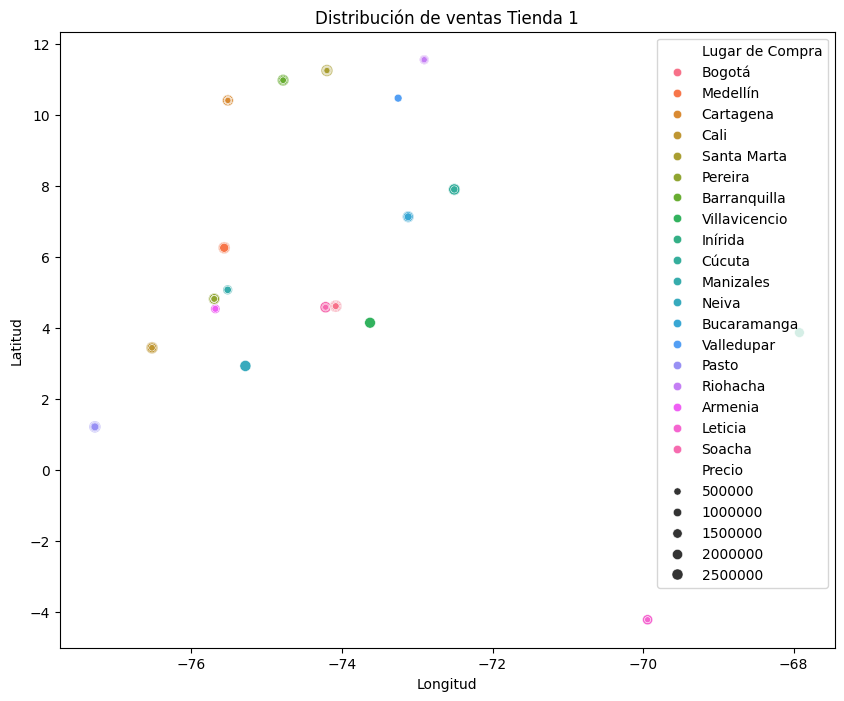

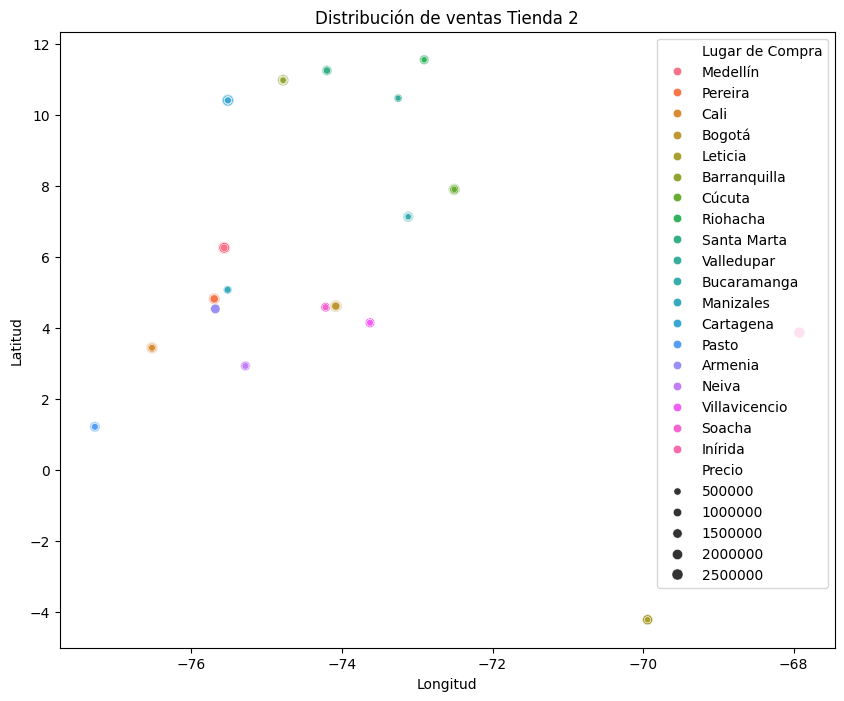

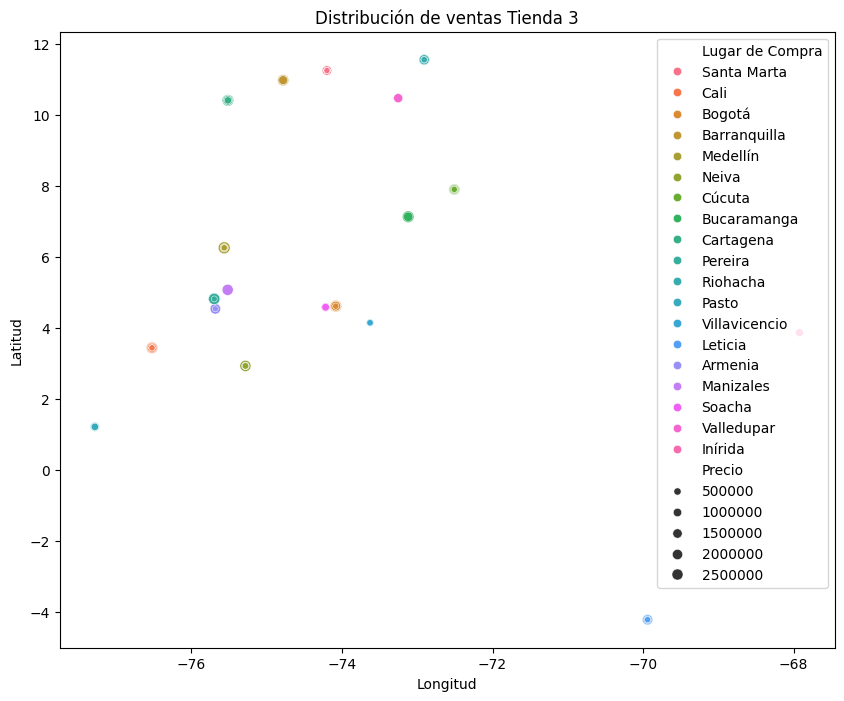

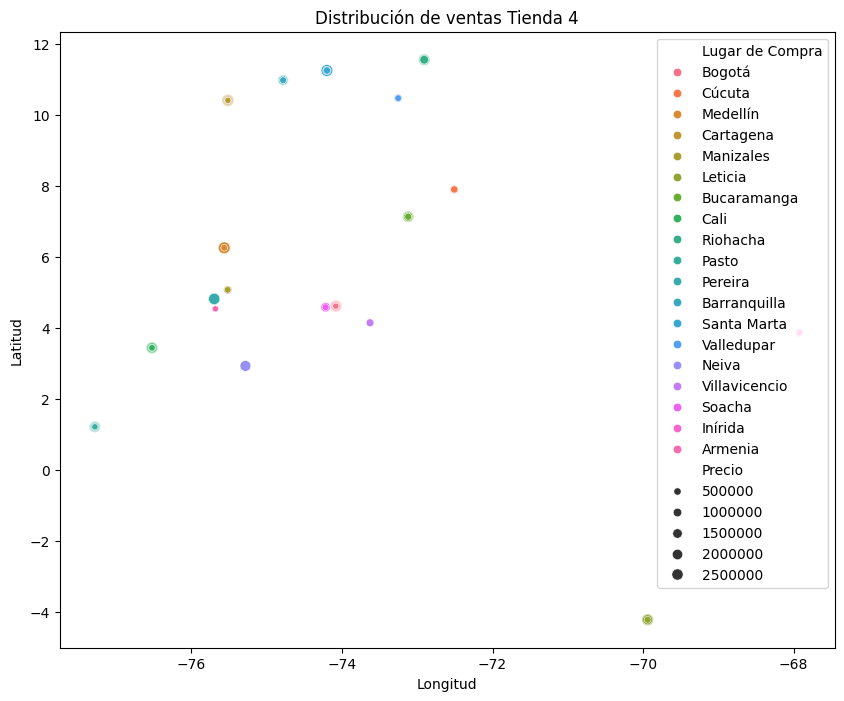

In [14]:
import seaborn as sns

def graficar_distribucion_de_ventas(tiendas, nombres):
    for tienda, nombre in zip(tiendas, nombres):
      plt.figure(figsize=(10, 8))
      sns.scatterplot(x='lon', y='lat', hue='Lugar de Compra', size='Precio', data=tienda)
      plt.title(f'Distribución de ventas {nombre}')
      plt.xlabel("Longitud")
      plt.ylabel("Latitud")
      print()
      plt.show()

graficar_distribucion_de_ventas(tiendas, nombres)

# **Análisis de rendimiento por región**

## **Patrones geográficos identificados**

### **Desempeño por densidad poblacional:**

- Tiendas con mejor distribución en ciudades densamente pobladas (Tienda 1 y Tienda 3) tienen mayores ingresos

### **Efecto de ingresos regionales:**

- Regiones con mayores ingresos (ciudades principales como Medellín, Bogotá, Cali, Barranquilla, Santa Marta, entre otras) muestran ventas de mayor valor